In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Loading the Data

In [35]:
init_df = pd.read_csv('./data/Admission_Predict_Ver1.1.csv')

In [36]:
init_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
init_df.shape

(500, 9)

In [38]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [39]:
init_df.duplicated().sum()

np.int64(0)

In [40]:
df = init_df
df.shape

(500, 9)

# Feature Selection

In [41]:
df.drop(['Serial No.'], axis='columns', inplace=True)

In [42]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data Spliting and Scaling

In [43]:
x = df.drop(['Chance of Admit '], axis='columns')
y = df['Chance of Admit ']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print("Training Data:", x_train.shape, y_train.shape)
print("Test Data:", x_test.shape, y_test.shape)

Training Data: (400, 7) (400,)
Test Data: (100, 7) (100,)


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Training

In [46]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

c:\Users\saumy\OneDrive\Desktop\PROJECT\Python\GraduateAdmissionPrediction-ANN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [50]:
NN = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.2058 - val_loss: 1.2046
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0143 - val_loss: 1.0225
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8630 - val_loss: 0.8760
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7419 - val_loss: 0.7535
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6413 - val_loss: 0.6531
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5594 - val_loss: 0.5719
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4912 - val_loss: 0.5108
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4478 - val_loss: 0.4814
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4315 - val_loss: 0.4670
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4194 - val_loss: 0.4553
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4086 - val_loss: 0.4444
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

# Model Prediction

In [51]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7689996936586804

# Plots

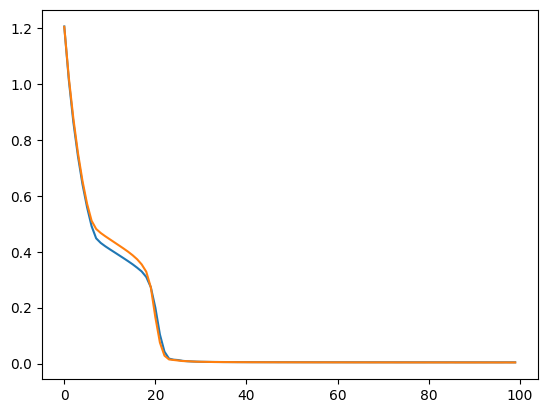

In [53]:
plt.plot(NN.history['loss'])
plt.plot(NN.history['val_loss'])